In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
xe136cross=pd.read_csv('../crosssections/Xe136_N_XSec.csv',engine='python',header=None,delim_whitespace=True)
xe131cross=pd.read_csv('../crosssections/Xe131_N_XSec.csv',engine='python',header=None,delim_whitespace=True)
He3cross=pd.read_csv('../crosssections/He3_N_XSec.csv',engine='python',header=None,delim_whitespace=True)

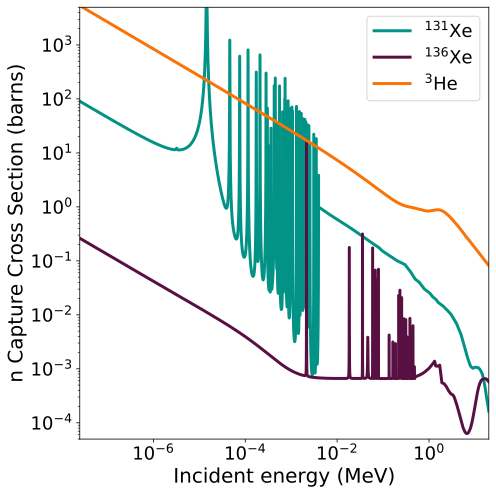

In [3]:
plt.figure(figsize=(7,7))

plt.plot(xe131cross[0]*1e-6,xe131cross[1],label="$^{131}$Xe",color='xkcd:teal',lw=3)
plt.plot(xe136cross[0]*1e-6,xe136cross[1],label="$^{136}$Xe",color='xkcd:plum',lw=3)
plt.plot(He3cross[0]*1e-6,He3cross[1],label="$^{3}$He",color='xkcd:orange',lw=3)

plt.semilogx()
plt.semilogy()
plt.yticks(fontsize=18)  
plt.xticks(fontsize=18) 
plt.ylim(5e-5,5000)  
plt.xlim(25e-9,20)
plt.ylabel("n Capture Cross Section (barns)",fontsize=20)
plt.xlabel('Incident energy (MeV)',fontsize=20)
plt.tight_layout()
plt.legend(fontsize=18,loc='upper right')
plt.show()

Thermal and Fast Neutrons

In [2]:
# Thermal Neutrons
Tneutrons = sorted(glob.glob("../outputs/Thermal/*"), reverse=True)
Fneutrons = sorted(glob.glob("../outputs/Fast/*"), reverse=True)
Fneutrons

['../outputs/Fast/Fast_Neutrons_to_Xe137_He_100.h5',
 '../outputs/Fast/FastNeutrons_to_Xe137_He_99.9.h5',
 '../outputs/Fast/FastNeutrons_to_Xe137_He_99.75.h5',
 '../outputs/Fast/FastNeutrons_to_Xe137_He_99.5.h5',
 '../outputs/Fast/FastNeutrons_to_Xe137_He_99.25.h5',
 '../outputs/Fast/FastNeutrons_to_Xe137_He_99.0.h5',
 '../outputs/Fast/FastNeutrons_to_Xe137_He_98.h5',
 '../outputs/Fast/FastNeutrons_to_Xe137_He_97.h5',
 '../outputs/Fast/FastNeutrons_to_Xe137_He_96.h5',
 '../outputs/Fast/FastNeutrons_to_Xe137_He_95.h5',
 '../outputs/Fast/FastNeutrons_to_Xe137_He_94.h5',
 '../outputs/Fast/FastNeutrons_to_Xe137_He_93.h5',
 '../outputs/Fast/FastNeutrons_to_Xe137_He_92.h5',
 '../outputs/Fast/FastNeutrons_to_Xe137_He_91.h5',
 '../outputs/Fast/FastNeutrons_to_Xe137_He_90.h5']

In [3]:
# Thermal Neutrons
Tneutrons_E     = [] # Array of dataframe containing energies of thermal neutrons
Tneutrons_tot   = [] # Array of Total simulated neutrons
Tneutrons_Xe137 = [] # Array of Total Xe137 produced

# pct = np.array([99.9, 99.5, 99.25, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90])
pct = []

# Load in the dataframes
for idx, f in enumerate(Tneutrons):
    Tneutrons_E.append(pd.read_hdf(f,'Energy'))
    Tneutrons_Xe137.append(len(Tneutrons_E[idx]))
    Metadata = pd.read_hdf(f,'Metadata')
    Tneutrons_tot.append(Metadata['Num_Events'].sum())
    pct.append(float(Metadata['Percentage'].iloc[0]))

    print(Tneutrons_tot[idx], Tneutrons_Xe137[idx], pct[idx])

# print(pct)

1000000 7297 100.0
1000000 611 99.9
1000000 261 99.75
1000000 109 99.5
1000000 67 99.25
1000000 64 99.0
1000000 25 98.0
1000000 21 97.0
1000000 15 96.0
1000000 20 95.0
1000000 9 94.0
1000000 4 93.0
1000000 9 92.0
1000000 10 91.0
1000000 5 90.0


In [4]:
# Fast Neutrons
Fneutrons_E     = [] # Array of dataframe containing energies of thermal neutrons
Fneutrons_tot   = [] # Array of Total simulated neutrons
Fneutrons_Xe137 = [] # Array of Total Xe137 produced

# pct = np.array([99.9, 99.5, 99.25, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90])
pct = []

# Load in the dataframes
for idx, f in enumerate(Fneutrons):
    Fneutrons_E.append(pd.read_hdf(f,'Energy'))
    Fneutrons_Xe137.append(len(Fneutrons_E[idx]))
    Metadata = pd.read_hdf(f,'Metadata')
    Fneutrons_tot.append(Metadata['Num_Events'].sum())
    pct.append(float(Metadata['Percentage'].iloc[0]))

    print(Fneutrons_tot[idx], Fneutrons_Xe137[idx], pct[idx])

# print(pct)

1000000 1923 100.0
1000000 227 99.9
1000000 143 99.75
1000000 99 99.5
1000000 78 99.25
1000000 69 99.0
1000000 54 98.0
1000000 57 97.0
1000000 45 96.0
1000000 35 95.0
1000000 39 94.0
1000000 34 93.0
1000000 25 92.0
1000000 22 91.0
1000000 23 90.0


In [5]:
# Standard Parameters
Enrich_Xe136 = 0.902616 # Enrichment of Xenon 136
Active_Mass  = 1109     # Total mass in the active volume of the detector

# Normalised events = (N137 / Enrich * Pct * M ) / total
Tneutrons_Xe137 = np.asarray(Tneutrons_Xe137)
Tneutrons_tot   = np.asarray(Tneutrons_tot)

Fneutrons_Xe137 = np.asarray(Fneutrons_Xe137)
Fneutrons_tot   = np.asarray(Fneutrons_tot)

pct             = np.asarray(pct)

Tneutrons_tot_norm = Tneutrons_Xe137 / ( Tneutrons_tot * Enrich_Xe136 * Active_Mass * 0.01*pct)
Fneutrons_tot_norm = Fneutrons_Xe137 / ( Fneutrons_tot * Enrich_Xe136 * Active_Mass * 0.01*pct)
# Tneutrons_tot_norm

In [6]:
# Calculate the Statistial Uncertainties
Tneutrons_Err   = [] # Statistical Uncertainty
Fneutrons_Err   = [] # Statistical Uncertainty

for idx in range(0 , len(Tneutrons_Xe137)):
    Tneutrons_Err.append(Tneutrons_tot_norm[idx] * np.sqrt(1 / Tneutrons_Xe137[idx]))

for idx in range(0 , len(Fneutrons_Xe137)):
    Fneutrons_Err.append(Fneutrons_tot_norm[idx] * np.sqrt(1 / Fneutrons_Xe137[idx]))


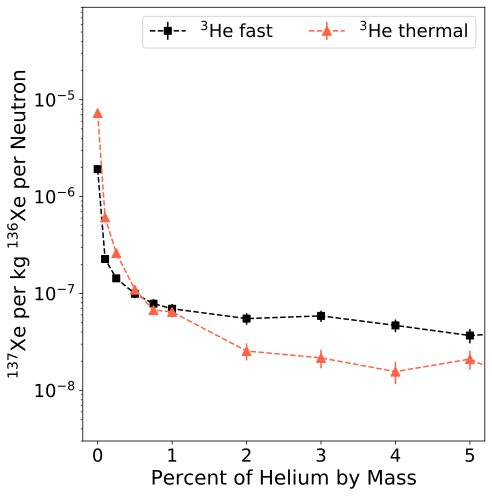

In [7]:
# Make the Plot
plt.figure(figsize=(7,7))
plt.errorbar(100 - pct, Fneutrons_tot_norm, color="k", yerr=Fneutrons_Err,fmt='s',label="$^{3}$He fast",ms=7, ls='--')
plt.errorbar(100 - pct, Tneutrons_tot_norm, color="tomato", yerr=Tneutrons_Err,fmt='^',label="$^{3}$He thermal",ms=9, ls='--')


plt.semilogy()
plt.yticks(fontsize=18)  
plt.xticks(fontsize=18) 
plt.xlim(-.2,5.2) 

plt.ylim(3e-9,9e-5)  
plt.ylabel("$^{137}$Xe per kg $^{136}$Xe per Neutron",fontsize=20)
plt.yticks(fontsize=18) 
plt.xlabel('Percent of Helium by Mass',fontsize=20)
plt.tight_layout()
plt.legend(fontsize=18,loc=1,ncol=2)
plt.show()

Muon Studies

In [4]:
acti_file = '../Xe137Count_sim87799000muons.h5'
# acti_file = '../outputs/Muons.next.h5'
muonnrgsproducingXe137 = pd.read_hdf(acti_file)


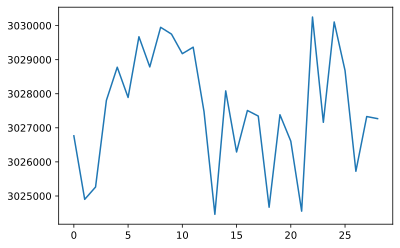

In [5]:
# Number of simulated Muons
numberofmuons=87799000 

# Binning Settings
low_lim  = 1     # GeV
high_lim = 3000  # GeV
stp_size = 100
bins        = np.linspace(low_lim, high_lim, 30) # 30 bins from 1 - 3k GeV
bin_centers = bins[:-1] + np.diff(bins) / 2      # Shift values to bin centers

# Create a flat distribution from 1 - 3k GeV
nrgs = np.random.uniform(low_lim, high_lim, numberofmuons) 

# Make histogram from distribution with 1 - 3k GeV binning
binned_sim_muons, _ = np.histogram(nrgs, bins=bins)
plt.plot(binned_sim_muons)

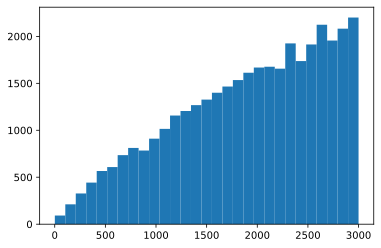

In [6]:
# Plot the muon energies from 1 - 3k GeV
binned_Xe137data    = plt.hist(muonnrgsproducingXe137['Xemunrg']*10**-3, bins)


In [7]:
# Load in the datframe again
xe137_df = pd.read_hdf(acti_file)

# Add an extra column converting units to GeV
xe137_df['GeV'] = xe137_df.Xemunrg * 1e-3

# Make a histogram of the data
xe137_count, _ = np.histogram(xe137_df.GeV.values, bins = bins)

# Divide the muon energy by the random flat distribution
xe137_exp      = xe137_count / binned_sim_muons

xe137_exp_err  = xe137_exp * np.sqrt(1 / xe137_count + 1 / numberofmuons)
print(xe137_exp_err)

[3.16895037e-06 4.80209319e-06 5.97739138e-06 6.95144216e-06
 7.85492736e-06 8.14353936e-06 8.94849241e-06 9.40830288e-06
 9.24112089e-06 9.96218932e-06 1.05174672e-05 1.12283979e-05
 1.14661094e-05 1.17737451e-05 1.20301479e-05 1.23639373e-05
 1.26469357e-05 1.29418413e-05 1.32783213e-05 1.34907092e-05
 1.35305250e-05 1.34546615e-05 1.44791033e-05 1.37679266e-05
 1.44383652e-05 1.52170028e-05 1.46170526e-05 1.50725108e-05
 1.54976001e-05]


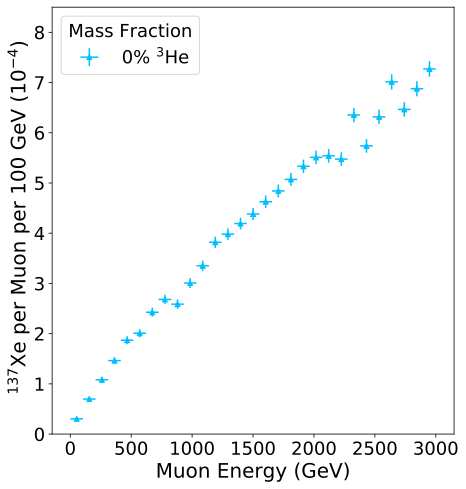

In [8]:
plt.figure(figsize=(7,7))


plt.xlabel('Muon Energy (GeV)',fontsize=20)
plt.ylabel(' $^{137}$Xe per Muon per '+str(stp_size)+ ' GeV (10$^{-4}$)',fontsize=20)
plt.yticks(fontsize=18) 
plt.xticks(fontsize=18)

plt.tight_layout()
#plt.semilogy()
plt.ylim(0,8.5)
#plt.bar(bin_centers,(binned_Xe137data[0]/binned_sim_muons),width=stp_size,color="deepskyblue",label="0% Helium")    
plt.errorbar(bin_centers, (binned_Xe137data[0]/binned_sim_muons*10**4 ), fmt='^',
                 xerr = np.diff(bins) / 2, yerr = xe137_exp_err*10**4,color="deepskyblue",label="0% $^{3}$He",ms=5) 
             
             
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend(fontsize=18, loc="upper left", title="Mass Fraction",title_fontsize=18)
plt.savefig("xepermuenerg.png",dpi=250,bbox_inches='tight')
#plt.savefig("xepermuenerg.pdf")
plt.show()